C:\Users\sinth\AppData\Local\Temp\ipykernel_13284\4268073742.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_input_variability = df['Input Variability'].resample('M').mean()
C:\Users\sinth\AppData\Local\Temp\ipykernel_13284\4268073742.py:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_output_variability = df['Output Variability'].resample('M').mean()


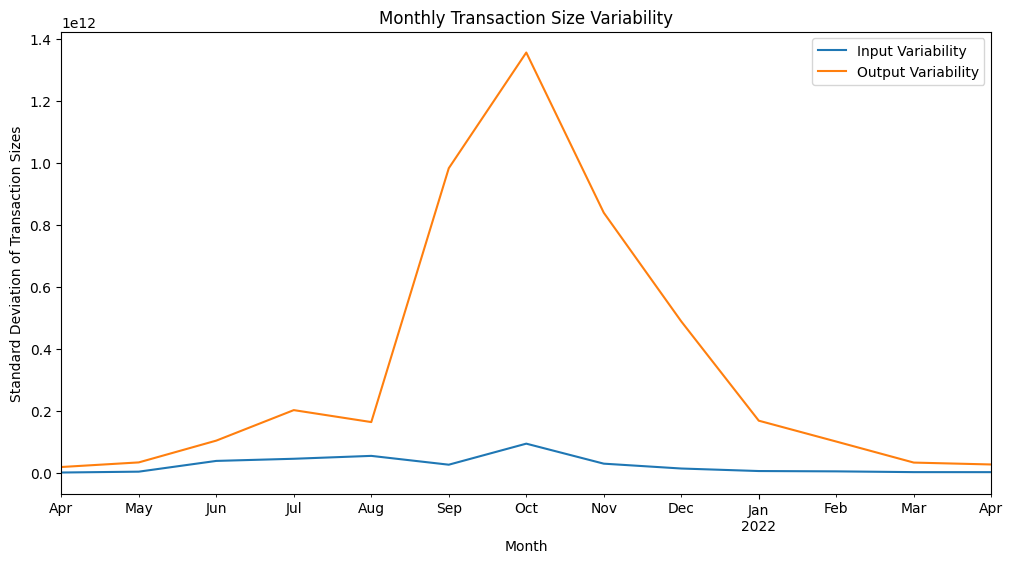

Correlation between total input and output amounts: 0.9711927942713867


In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('iotaDB.db')
cursor = conn.cursor()

# Query the database for transaction amounts and addresses
query = """
SELECT timestamp, input_amounts_x, output_amounts_y FROM Transactions
"""
cursor.execute(query)
data = cursor.fetchall()

# Close the database connection
conn.close()

# Create a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Input Amounts', 'Output Amounts'])

# Convert columns and parse as needed
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Input Amounts'] = df['Input Amounts'].apply(eval)
df['Output Amounts'] = df['Output Amounts'].apply(eval)

# Set index to Timestamp
df.set_index('Timestamp', inplace=True)

# 1. Transaction Size Variability Over Time
df['Input Variability'] = df['Input Amounts'].apply(lambda x: pd.Series(x).std() if len(x) > 1 else 0)
df['Output Variability'] = df['Output Amounts'].apply(lambda x: pd.Series(x).std() if len(x) > 1 else 0)

monthly_input_variability = df['Input Variability'].resample('M').mean()
monthly_output_variability = df['Output Variability'].resample('M').mean()

plt.figure(figsize=(12, 6))
monthly_input_variability.plot(label='Input Variability')
monthly_output_variability.plot(label='Output Variability')
plt.title('Monthly Transaction Size Variability')
plt.xlabel('Month')
plt.ylabel('Standard Deviation of Transaction Sizes')
plt.legend()
plt.show()

# 2. Correlation Between Input and Output Amounts
df['Total Input'] = df['Input Amounts'].apply(sum)
df['Total Output'] = df['Output Amounts'].apply(sum)

correlation = df[['Total Input', 'Total Output']].corr().iloc[0, 1]

print(f"Correlation between total input and output amounts: {correlation}")

# 3. Concentration of Transactions by Address
# Assuming transaction address data is also available and structured similarly
# This part would need real data examples to implement correctly

# Assuming additional code here for querying and processing transaction address data

# Interpretations for the thesis are based on actual observations which would need the data
